# Explore here

In [9]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv"
data = pd.read_csv(url)

# Display the first few rows and get column information
print(data.head())
print(data.info())
print(data.describe())
print(data.columns)  # Check column names to identify the target variable

   fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
0  1001    55601   6787               12.206615    7637   
1  1003   218022  24757               11.355276   26913   
2  1005    24881   2732               10.980266    2960   
3  1007    22400   2456               10.964286    2596   
4  1009    57840   7095               12.266598    7570   

   10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                 13.735364   6878                 12.370281   7089   
1                 12.344167  23579                 10.814964  25213   
2                 11.896628   3268                 13.134520   3201   
3                 11.589286   3029                 13.522321   3113   
4                 13.087828   6742                 11.656293   6884   

   30-39 y/o % of total pop  ...  COPD_number  diabetes_prevalence  \
0                 12.749771  ...         3644                 12.9   
1                 11.564429  ...        14692                 12.0   
2       

In [11]:
print(data.isnull().sum())

# Drop or fill missing values as necessary
data.fillna(0, inplace=True)  # Example: filling missing values with 0

fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64


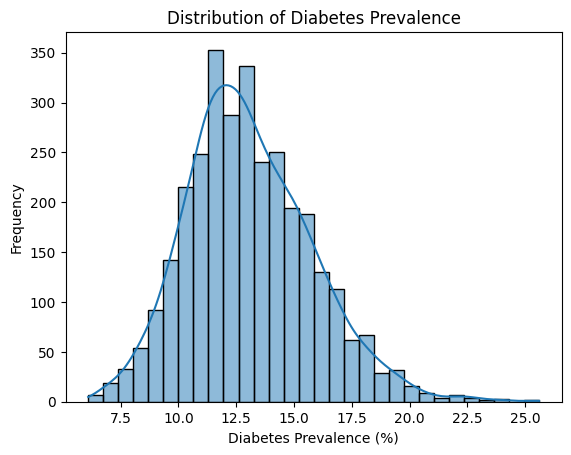

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the distribution of the target variable
sns.histplot(data['diabetes_prevalence'], bins=30, kde=True)
plt.title('Distribution of Diabetes Prevalence')
plt.xlabel('Diabetes Prevalence (%)')
plt.ylabel('Frequency')
plt.show()

In [14]:
print(data.dtypes)

fips                        int64
TOT_POP                     int64
0-9                         int64
0-9 y/o % of total pop    float64
19-Oct                      int64
                           ...   
CKD_prevalence            float64
CKD_Lower 95% CI          float64
CKD_Upper 95% CI          float64
CKD_number                  int64
Urban_rural_code            int64
Length: 108, dtype: object


In [15]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

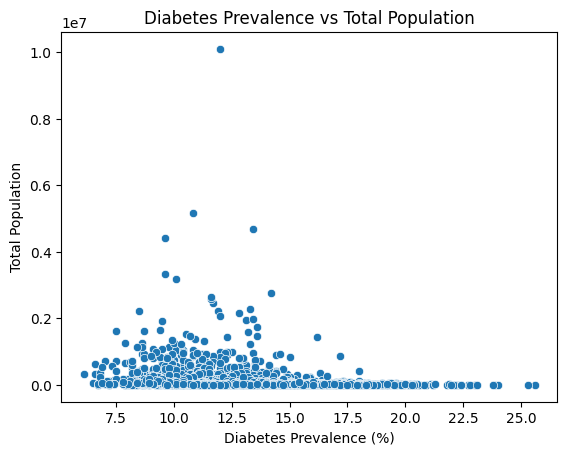

In [17]:
sns.scatterplot(x='diabetes_prevalence', y='TOT_POP', data=data)
plt.title('Diabetes Prevalence vs Total Population')
plt.xlabel('Diabetes Prevalence (%)')
plt.ylabel('Total Population')
plt.show()


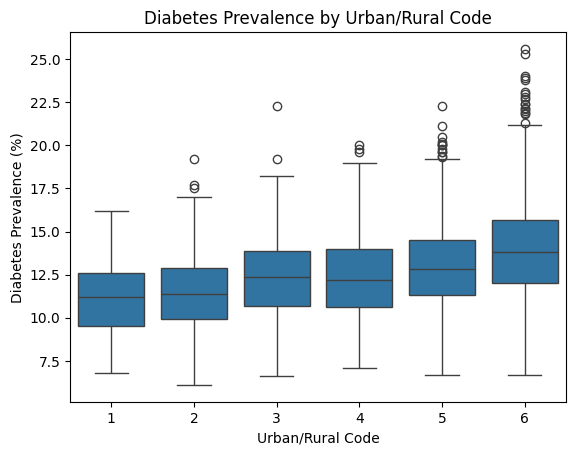

In [18]:
sns.boxplot(x='Urban_rural_code', y='diabetes_prevalence', data=data)
plt.title('Diabetes Prevalence by Urban/Rural Code')
plt.xlabel('Urban/Rural Code')
plt.ylabel('Diabetes Prevalence (%)')
plt.show()

In [19]:
features = data.drop(columns=['fips', 'diabetes_prevalence'])
target = data['diabetes_prevalence']

In [20]:
features_encoded = pd.get_dummies(features, drop_first=True)

In [27]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

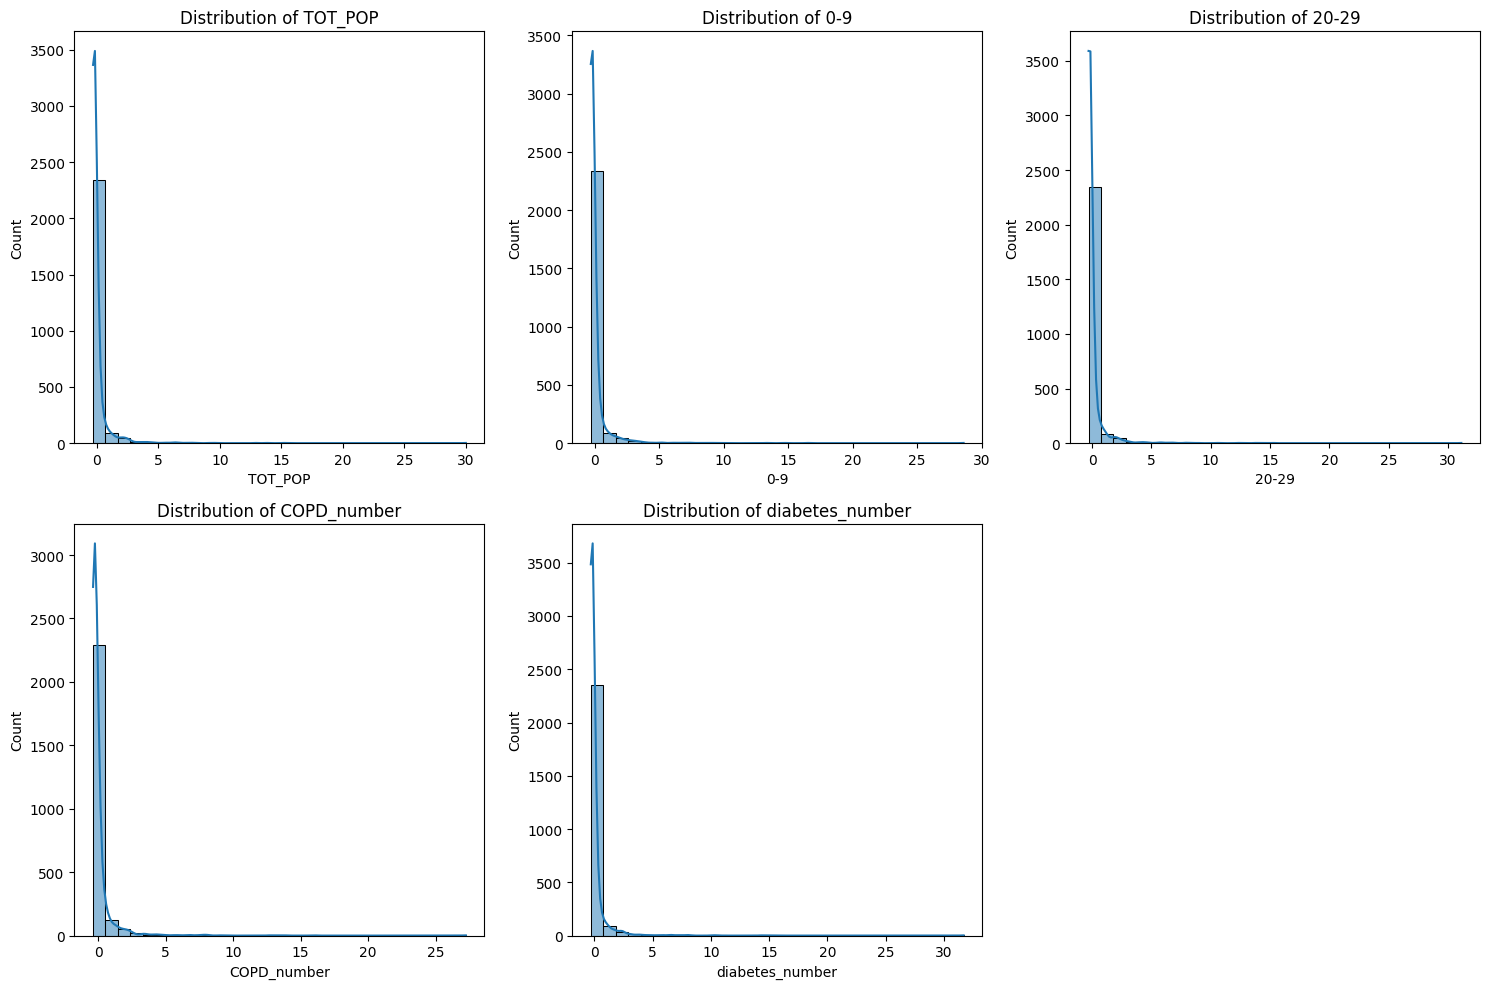

In [28]:
features_to_plot = ['TOT_POP', '0-9', '20-29', 'COPD_number', 'diabetes_number']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 3, i+1)
    sns.histplot(train_data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

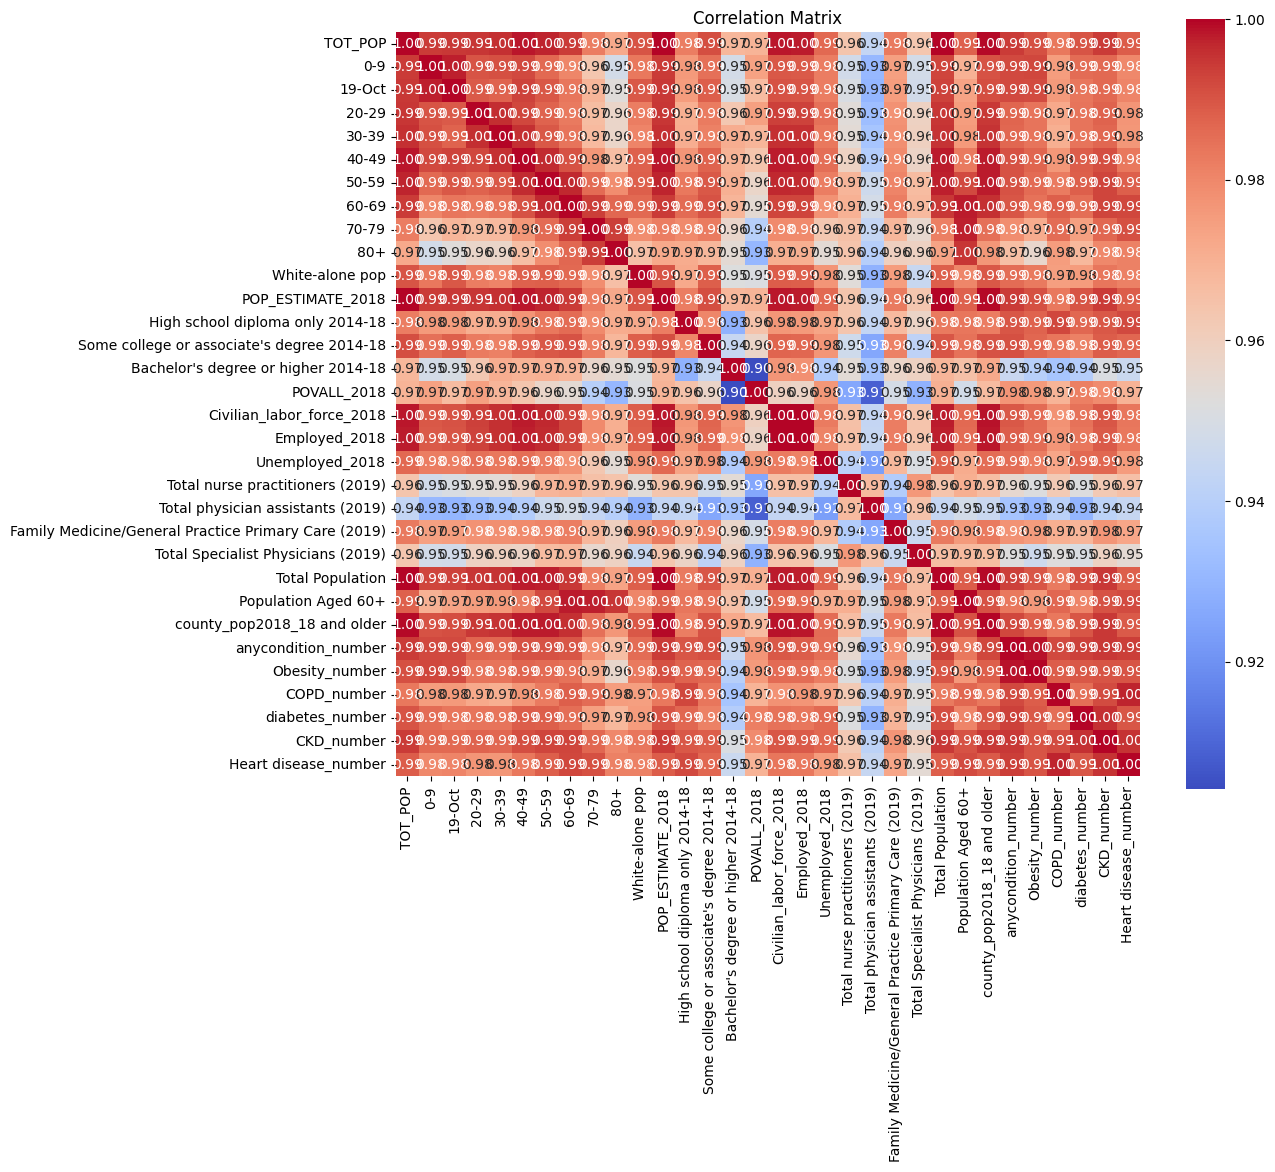

In [ ]:
plt.figure(figsize=(12, 10))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

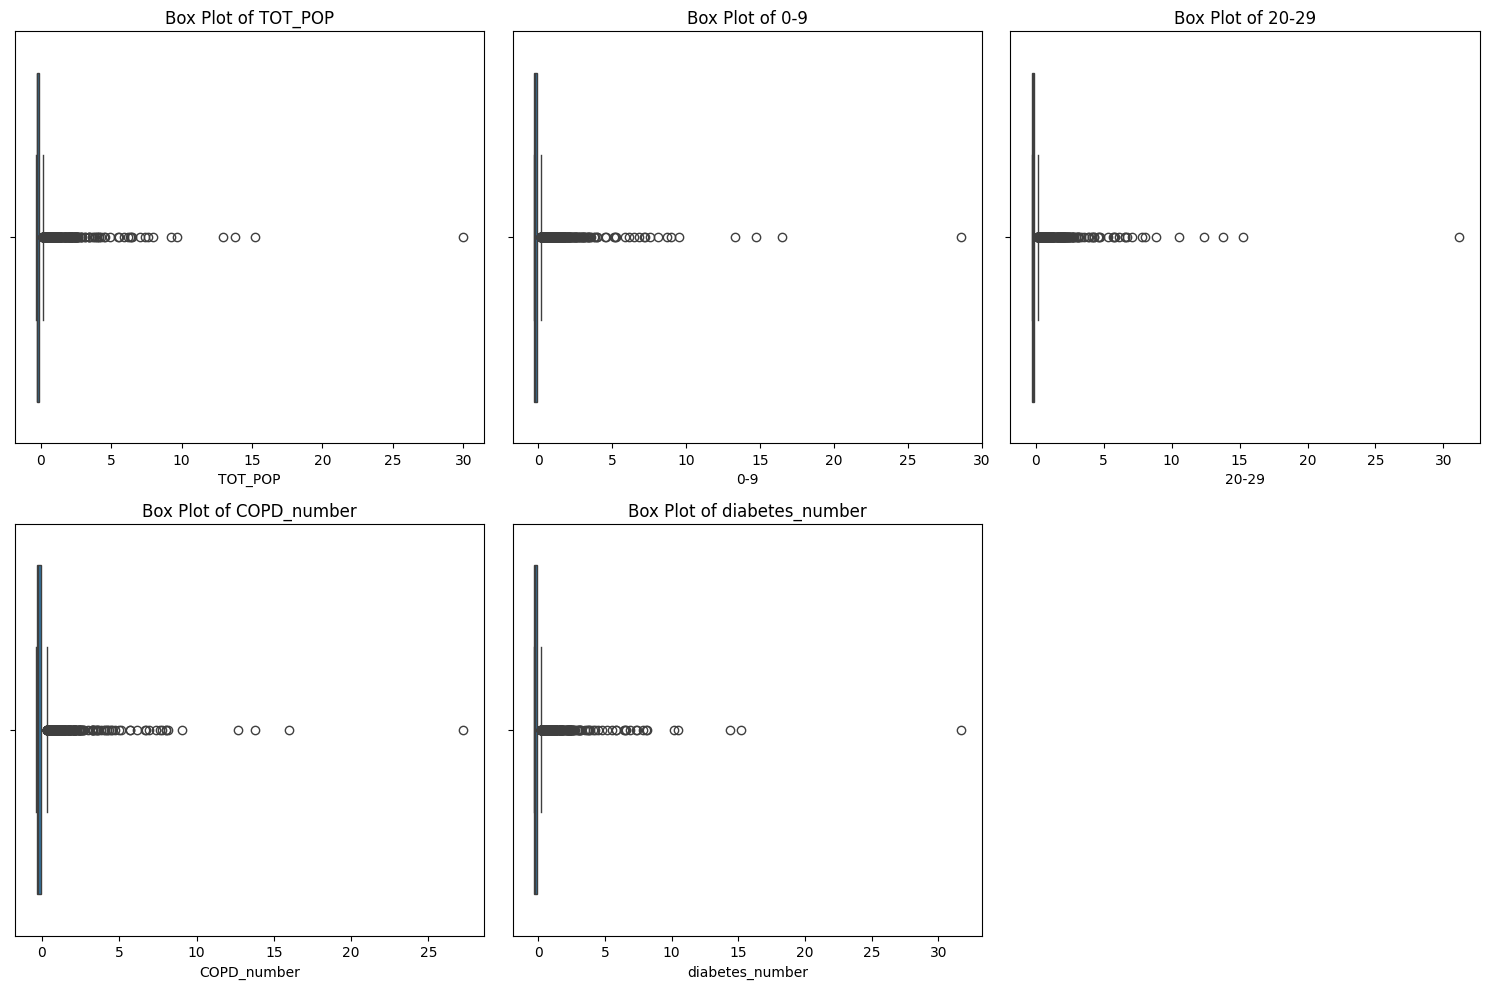

In [30]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=train_data[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

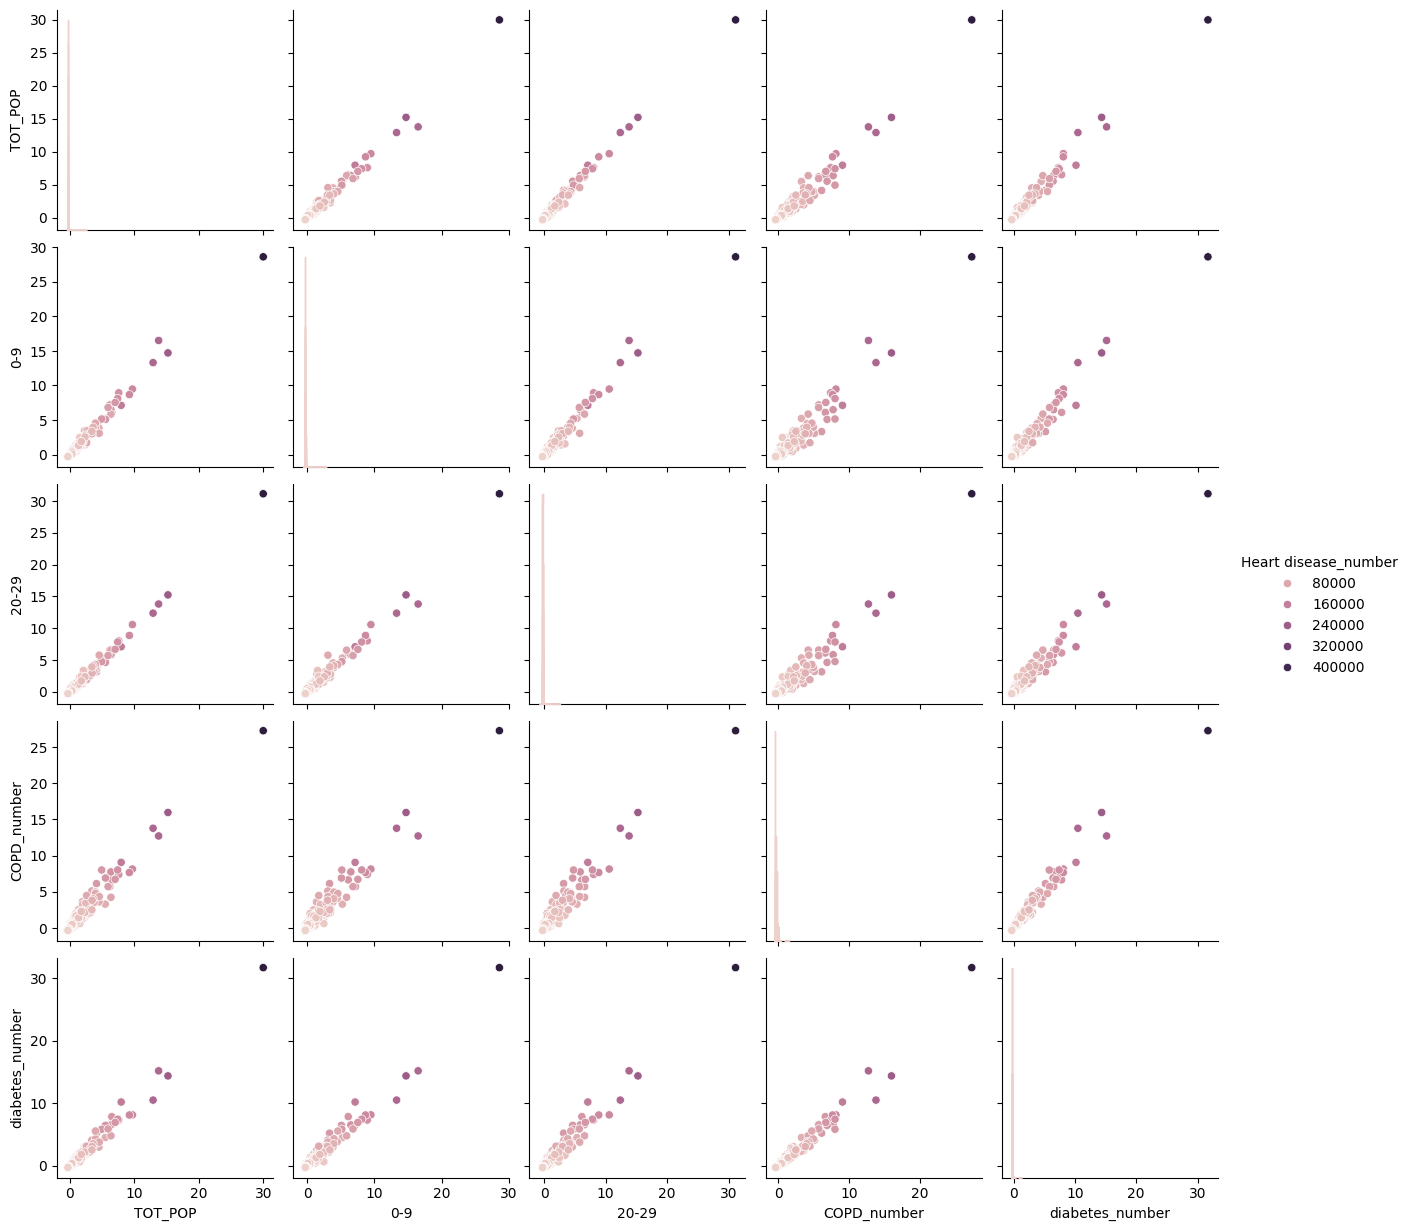

In [31]:
sns.pairplot(train_data, hue='Heart disease_number', vars=features_to_plot)
plt.show()

In [34]:
grouped_data = train_data.groupby('Heart disease_number').mean()
print(grouped_data)

                        TOT_POP        0-9     19-Oct      20-29      30-39  \
Heart disease_number                                                          
7                     -0.311928  -0.304117  -0.315533  -0.291414  -0.283577   
10                    -0.312120  -0.304787  -0.316195  -0.291898  -0.283883   
17                    -0.311553  -0.303902  -0.315320  -0.291333  -0.283352   
27                    -0.310989  -0.303328  -0.314539  -0.290849  -0.283067   
31                    -0.310957  -0.303471  -0.315083  -0.290627  -0.283352   
...                         ...        ...        ...        ...        ...   
169691                 7.967467   7.130290   7.051668   7.082870   7.560855   
214400                13.775150  16.508494  15.525931  13.798023  14.581494   
214586                12.912275  13.304860  13.889890  12.363945  12.094802   
242072                15.219919  14.709383  14.442830  15.234240  15.713149   
434790                29.986269  28.600342  28.99335